In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [3]:
base_dir = 'Combined'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
headers = None

In [4]:
X_train = []
y_train = []

for category in os.listdir(train_dir):
    category_path = os.path.join(train_dir, category)
    if os.path.isdir(category_path):
        for file_name in os.listdir(category_path):
            if file_name.endswith('.csv'):
                file_path = os.path.join(category_path, file_name)
                if headers is None:
                    headers = pd.read_csv(file_path, nrows=1).columns.tolist()
                df = pd.read_csv(file_path)
                X_train.append(df.values)
                y_train.extend([category] * len(df))

X_train = np.vstack(X_train)
y_train = np.array(y_train)

In [5]:
X_test = []
y_test = []

for category in os.listdir(test_dir):
    category_path = os.path.join(test_dir, category)
    if os.path.isdir(category_path):
        for file_name in os.listdir(category_path):
            if file_name.endswith('.csv'):
                file_path = os.path.join(category_path, file_name)
                if headers is None:
                    headers = pd.read_csv(file_path, nrows=1).columns.tolist()
                df = pd.read_csv(file_path)
                X_test.append(df.values) 
                y_test.extend([category] * len(df)) 

X_test = np.vstack(X_test)
y_test = np.array(y_test) 

Accuracy: 0.72
Precision: 0.72
Recall: 0.72


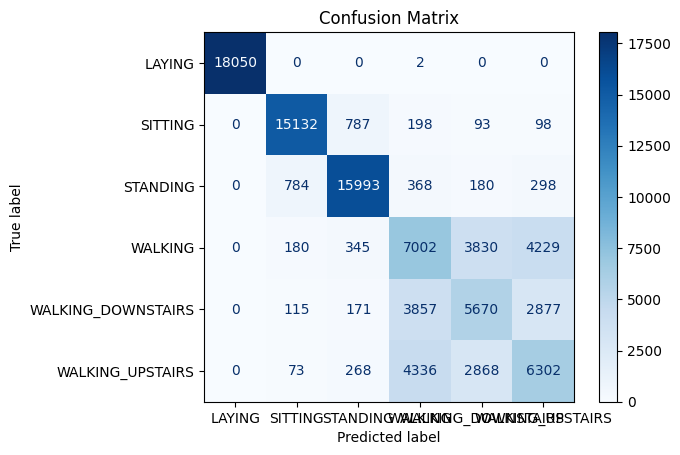

In [10]:
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_split, y_train_split)

y_pred = model.predict(X_test_split)

accuracy = accuracy_score(y_test_split, y_pred)
precision = precision_score(y_test_split, y_pred, average='weighted')
recall = recall_score(y_test_split, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test_split, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.56
Precision: 0.59
Recall: 0.56


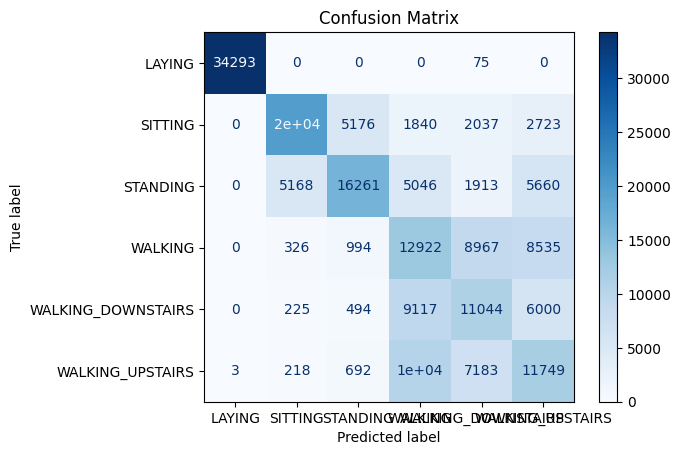

In [11]:
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_split, y_train_split)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()